## Escalamiento Multidimensional (MDS)

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


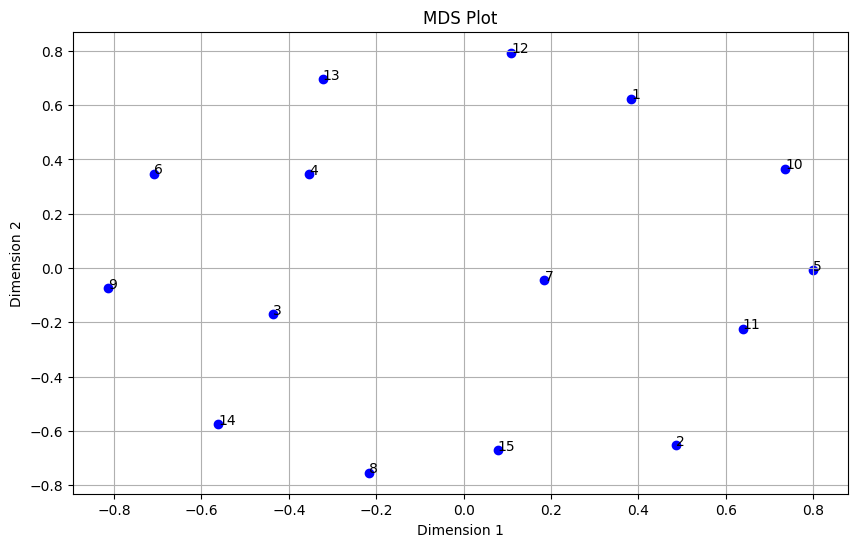

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import MDS
import matplotlib.pyplot as plt

# Datos proporcionados
data = {
    'Codigos de respuesta': [26, 12, 21, 39, 43, 29, 13, 8, 42, 36, 19, 42, 31, 19, 1],
    'FOLIO': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
    'Genero': [2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1],
    'Edad': [32, 26, 22, 46, 49, 45, 21, 31, 34, 33, 23, 44, 28, 37, 38],
    'Edo. Civil': [3, 2, 2, 1, 1, 5, 6, 2, 6, 2, 2, 3, 1, 2, 4],
    'Nivel socioeconómico': [3, 2, 1, 3, 3, 4, 1, 4, 5, 3, 5, 3, 6, 2, 4],
    'Licenciatura': [3, 2, 3, 1, 3, 3, 3, 1, 2, 1, 2, 1, 3, 3, 2],
    'Semestre/cuatrimestre': [8, 8, 3, 8, 9, 2, 4, 3, 6, 9, 8, 5, 2, 7, 4],
    'Turno': [3, 3, 1, 2, 2, 3, 2, 1, 2, 1, 2, 3, 3, 1, 3],
    'Otras variables demográficas de control': [2, 2, 2, 4, 4, 3, 1, 1, 1, 3, 2, 2, 2, 1, 3],
    'Q1': [4, 4, 5, 3, 5, 3, 4, 4, 4, 1, 5, 1, 1, 4, 5],
    'Q2': [4, 4, 4, 3, 5, 2, 3, 3, 1, 3, 4, 3, 4, 3, 2],
    'Q3': [2, 5, 4, 3, 4, 4, 5, 2, 2, 2, 4, 1, 4, 3, 4],
    'Q4': [4, 3, 4, 2, 4, 1, 1, 2, 5, 5, 1, 4, 1, 4, 5],
    'Q5': [2, 2, 3, 3, 1, 5, 2, 4, 5, 1, 3, 3, 5, 4, 2],
    'Q6': [5, 5, 1, 2, 3, 1, 3, 5, 2, 5, 2, 1, 3, 2, 4],
    'Q7': [5, 1, 4, 5, 4, 4, 2, 2, 4, 1, 1, 4, 3, 1, 2],
    'Q8': [2, 1, 3, 2, 5, 4, 5, 1, 5, 5, 3, 3, 4, 3, 1],
    'Q9': [2, 1, 5, 2, 2, 4, 1, 3, 3, 1, 1, 1, 5, 5, 4],
    'Q10': [5, 1, 3, 4, 4, 5, 4, 1, 5, 5, 3, 3, 5, 3, 3],
    'Q11': [5, 4, 5, 4, 1, 4, 4, 3, 2, 2, 1, 5, 4, 1, 5],
    'Q12': [5, 4, 5, 2, 3, 2, 2, 2, 1, 3, 1, 2, 4, 3, 1],
    'Q13': [3, 1, 1, 3, 3, 2, 2, 1, 1, 5, 5, 4, 3, 1, 5],
    'Q14': [3, 3, 3, 1, 5, 4, 1, 4, 2, 2, 1, 2, 2, 2, 1],
    'Q15': [4, 4, 2, 1, 5, 1, 1, 1, 2, 5, 4, 4, 4, 3, 1],
    'Q16': [1, 4, 2, 4, 3, 1, 2, 3, 5, 5, 1, 1, 1, 4, 4],
}

# Convertir a DataFrame
df = pd.DataFrame(data)

# Seleccionamos solo las columnas de las preguntas (Q1-Q16)
questions = df.iloc[:, 10:]

# Escalamos los datos
scaler = StandardScaler()
questions_scaled = scaler.fit_transform(questions)

# Calculamos la matriz de disimilitud
dissimilarity = np.corrcoef(questions_scaled)

# Aplicamos el MDS
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
mds_results = mds.fit_transform(1 - dissimilarity)

# Visualizamos los resultados
plt.figure(figsize=(10, 6))
plt.scatter(mds_results[:, 0], mds_results[:, 1], color='blue')
for i, txt in enumerate(df['FOLIO']):
    plt.annotate(txt, (mds_results[i, 0], mds_results[i, 1]))
plt.title('MDS Plot')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.grid(True)
plt.show()
